In [1]:
# Ran once and formed the \data1\split folder.
# import os
# import shutil
# import random

# # Define data directory
# data_dir = "data1/Indian-monuments/images"
# train_dir = "data1/split/Indian-monuments/images/train"
# val_dir = "data1/split/Indian-monuments/images/validation"
# test_dir = "data1/split/Indian-monuments/images/test"

# # Create directories for train, validation, and test sets if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Define the ratio for splitting the data
# train_ratio = 0.8
# val_ratio = 0.1
# test_ratio = 0.1

# # Get the list of class directories
# class_directories = [
#     directory
#     for directory in os.listdir(data_dir)
#     if os.path.isdir(os.path.join(data_dir, directory))
# ]

# # Iterate over each class directory
# for class_dir in class_directories:
#     # Get the list of image filenames for the current class
#     class_images = os.listdir(os.path.join(data_dir, class_dir))
#     # Shuffle the list of image filenames
#     random.shuffle(class_images)

#     # Calculate the number of images for each subset
#     num_train = int(len(class_images) * train_ratio)
#     num_val = int(len(class_images) * val_ratio)
#     num_test = len(class_images) - num_train - num_val

#     # Split the images into train, validation, and test sets
#     train_images = class_images[:num_train]
#     val_images = class_images[num_train : num_train + num_val]
#     test_images = class_images[num_train + num_val :]

#     # Copy images to their respective directories
#     for image in train_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(train_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

#     for image in val_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(val_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

#     for image in test_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(test_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

# # Now you can use the directories train_dir, val_dir, and test_dir for training, validation, and testing respectively.

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
train_dir = Path("data1/split/Indian-monuments/images/train")
train_filepaths = (
    list(train_dir.glob("**/*.jpg"))
    + list(train_dir.glob("*.jpeg"))
    + list(train_dir.glob("*.png"))
)
val_dir = Path("data1/split/Indian-monuments/images/validation")
val_filepaths = (
    list(val_dir.glob("**/*.jpg"))
    + list(val_dir.glob("*.jpeg"))
    + list(val_dir.glob("*.png"))
)
test_dir = Path("data1/split/Indian-monuments/images/test")
test_filepaths = (
    list(test_dir.glob("**/*.jpg"))
    + list(test_dir.glob("*.jpeg"))
    + list(test_dir.glob("*.png"))
)

In [3]:
def proc_img(filepath):
    labels = [str(filepath[i]).split("\\")[-2] for i in range(len(filepath))]
    print(labels)
    filepath = pd.Series(filepath, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df


train_df = proc_img(train_filepaths)
val_df = proc_img(val_filepaths)
test_df = proc_img(test_filepaths)

['Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [5]:
train_df

,Filepath,Label
0,data1\split\Indian-monuments\images\train\golden temple\5.jpg,golden temple
1,data1\split\Indian-monuments\images\train\India gate pics\i (74).jpg,India gate pics
2,data1\split\Indian-monuments\images\train\Sun Temple Konark\(121).jpg,Sun Temple Konark
3,data1\split\Indian-monuments\images\train\qutub_minar\img358.jpg,qutub_minar
4,data1\split\Indian-monuments\images\train\jamali_kamali_tomb\img86.jpg,jamali_kamali_tomb
5,data1\split\Indian-monuments\images\train\qutub_minar\img303.jpg,qutub_minar
6,data1\split\Indian-monuments\images\train\iron_pillar\img150.jpg,iron_pillar
7,data1\split\Indian-monuments\images\train\Charar-E- Sharif\49.jpg,Charar-E- Sharif
8,data1\split\Indian-monuments\images\train\basilica_of_bom_jesus\17 - Copy.jpg,basilica_of_bom_jesus
9,data1\split\Indian-monuments\images\train\alai_darwaza\img150.jpg,alai_darwaza


In [6]:
val_df

,Filepath,Label
0,data1\split\Indian-monuments\images\validation\victoria memorial\108.jpg,victoria memorial
1,data1\split\Indian-monuments\images\validation\alai_darwaza\img141.jpg,alai_darwaza
2,data1\split\Indian-monuments\images\validation\charminar\(117).jpg,charminar
3,data1\split\Indian-monuments\images\validation\charminar\(142).jpg,charminar
4,data1\split\Indian-monuments\images\validation\alai_minar\img214.jpg,alai_minar
5,data1\split\Indian-monuments\images\validation\charminar\(150).jpg,charminar
6,data1\split\Indian-monuments\images\validation\Ellora Caves\(46).jpg,Ellora Caves
7,data1\split\Indian-monuments\images\validation\iron_pillar\img672.jpg,iron_pillar
8,data1\split\Indian-monuments\images\validation\qutub_minar\img359.jpg,qutub_minar
9,data1\split\Indian-monuments\images\validation\Charar-E- Sharif\33 - Copy.jpg,Charar-E- Sharif


In [7]:
test_df

,Filepath,Label
0,data1\split\Indian-monuments\images\test\iron_pillar\img159.jpg,iron_pillar
1,data1\split\Indian-monuments\images\test\golden temple\35.jpg,golden temple
2,data1\split\Indian-monuments\images\test\jamali_kamali_tomb\img149.jpg,jamali_kamali_tomb
3,data1\split\Indian-monuments\images\test\Ajanta Caves\(57).jpg,Ajanta Caves
4,data1\split\Indian-monuments\images\test\Fatehpur Sikri\31.jpg,Fatehpur Sikri
5,data1\split\Indian-monuments\images\test\Gateway of India\25.jpg,Gateway of India
6,data1\split\Indian-monuments\images\test\qutub_minar\img393.jpg,qutub_minar
7,data1\split\Indian-monuments\images\test\Humayun_s Tomb\48.jpg,Humayun_s Tomb
8,data1\split\Indian-monuments\images\test\mysore_palace\37.jpg,mysore_palace
9,data1\split\Indian-monuments\images\test\victoria memorial\164.jpg,victoria memorial


In [8]:
unique_labels = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
train_df["Label"].nunique()

24

In [9]:
val_df["Label"].nunique()

24

In [10]:
test_df["Label"].nunique()

24

In [11]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model

# Define data generators with preprocessing function for InceptionV3
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(299, 299),  # InceptionV3 expects 299x299
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

val_images = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(299, 299),  # InceptionV3 expects 299x299
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(299, 299),  # InceptionV3 expects 299x299
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

# Load InceptionV3 model with pre-trained weights and exclude the top layers
base_model = InceptionV3(
    weights="imagenet", include_top=False, pooling="avg", input_shape=(299, 299, 3)
)

# Freeze the base model layers (optional, you can experiment with unfreezing layers)
base_model.trainable = False

# Adding custom head for monument classification
x = base_model.output
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(train_df["Label"].nunique(), activation="softmax")(x)

# Create the final model with InceptionV3 as feature extractor and the custom head
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model on the training data with validation data for monitoring performance
history = model.fit(train_images, validation_data=val_images, epochs=10, verbose=1)


Found 2488 validated image filenames belonging to 24 classes.
Found 308 validated image filenames belonging to 24 classes.
Found 322 validated image filenames belonging to 24 classes.
87910968/87910968 [==============================] - 11s 0us/step
Epoch 1/10
78/78 [==============================] - 131s 2s/step - loss: 1.4758 - accuracy: 0.6045 - val_loss: 0.7061 - val_accuracy: 0.8084
Epoch 2/10
78/78 [==============================] - 135s 2s/step - loss: 0.4400 - accuracy: 0.8790 - val_loss: 0.4166 - val_accuracy: 0.8864
Epoch 3/10
78/78 [==============================] - 135s 2s/step - loss: 0.2776 - accuracy: 0.9252 - val_loss: 0.3523 - val_accuracy: 0.9058
Epoch 4/10
78/78 [==============================] - 135s 2s/step - loss: 0.1783 - accuracy: 0.9522 - val_loss: 0.3646 - val_accuracy: 0.9026
Epoch 5/10
78/78 [==============================] - 142s 2s/step - loss: 0.1360 - accuracy: 0.9634 - val_loss: 0.2658 - val_accuracy: 0.9188
Epoch 6/10
78/78 [===========================

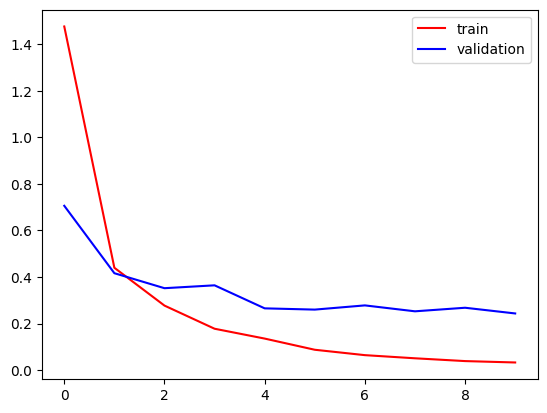

In [12]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

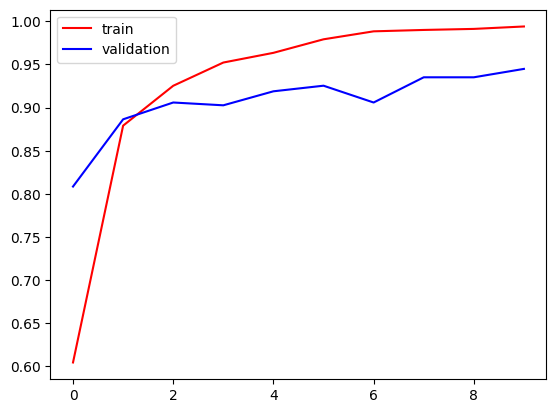

In [13]:
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

In [14]:
predicted_labels = model.predict(test_images)
label_mapping = {v: k for k, v in train_images.class_indices.items()}

# Convert predicted labels to class names
predicted_classes = [label_mapping[np.argmax(label)] for label in predicted_labels]

# Convert true labels to class names
true_classes = [label_mapping[label] for label in test_images.labels]

for i in range(10):
    print(f"True label: {true_classes[i]}, Predicted label: {predicted_classes[i]}")

from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {100 * acc:.2f}%")

11/11 [==============================] - 15s 1s/step
True label: iron_pillar, Predicted label: iron_pillar
True label: golden temple, Predicted label: golden temple
True label: jamali_kamali_tomb, Predicted label: alai_darwaza
True label: Ajanta Caves, Predicted label: Ajanta Caves
True label: Fatehpur Sikri, Predicted label: Fatehpur Sikri
True label: Gateway of India, Predicted label: Gateway of India
True label: qutub_minar, Predicted label: qutub_minar
True label: Humayun_s Tomb, Predicted label: Humayun_s Tomb
True label: mysore_palace, Predicted label: hawa mahal pics
True label: victoria memorial, Predicted label: victoria memorial
Accuracy: 95.03%


In [15]:
# Define the file path to save the predicted classes
output_file = "predicted_classes_inceptionv3.txt"

# Write the predicted classes to the file
with open(output_file, "w") as file:
    for predicted_class in predicted_classes:
        file.write(predicted_class + "\n")

print("Predicted classes saved to", output_file)

Predicted classes saved to predicted_classes_inceptionv3.txt


In [16]:
model.save(f"model_with_inceptionv3_{100 * acc:.2f}.h5")

C:\Users\tejaa\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import keras


keras.saving.save_model(model, f"model_with_inceptionv3_{100 * acc:.2f}.keras")

In [18]:
import pickle

with open("label_mapping.pkl", "wb") as f:
    pickle.dump(label_mapping, f)

print("Label mapping saved successfully.")

Label mapping saved successfully.


In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0